In [89]:
import numpy as np
from numpy import sin, cos, exp, abs, array, ones, zeros, linspace
from numpy import sqrt, matmul, pi
from numpy.linalg import eig

import scipy.integrate as integrate
from scipy.integrate import quad
import scipy.special as special
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [90]:
def pprint(M, indent=4):
    for row in M:
        string = '\t'.join(map('{:0.2e}'.format, row))
        print('['+string.expandtabs(indent)+']')

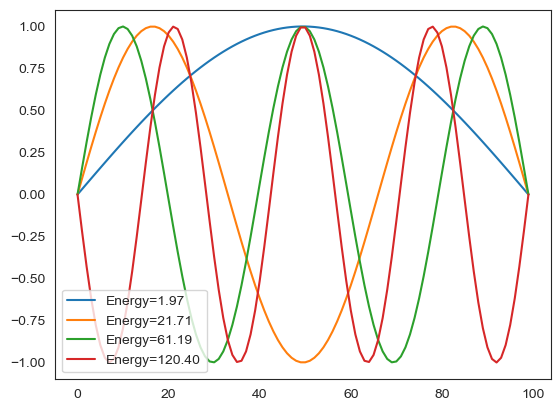

In [91]:
# psi = cos(pi*n*x/L)
L = 1   # 1p meter
b_f = lambda x, n: cos((2*n+1)*pi/L*x) # Base functions, sin and cos   |f>
Hb_f = lambda x, n: -(2*n+1)**2*pi**2/L**2/2*cos((2*n+1)*pi/L*x)   # 1/2 d2/dx2  H|f>
Hm = np.zeros((10, 10), dtype=np.float32)
Sm = np.zeros((10, 10), dtype=np.float32)

for n in range(0, 10):
    for m in range(0, 10):
        Hm[n, m] = quad(lambda x: b_f(x, n)*Hb_f(x, m), -L/2, L/2)[0]
        Sm[n, m] = quad(lambda x: b_f(x, n)*b_f(x, m), -L/2, L/2)[0]
E, V = eig(-Hm-Sm)
V = np.array(V).T
V = [x for _, x in sorted(zip(E, V))]
V = np.array(V)
E = sorted(E)
x = np.linspace(-L/2, L/2, 100)
for m in range(4):
    fn = 0
    for n in range(np.shape(V)[0]):
        fn += V[n, m]*b_f(x, n)
    plt.plot(fn, label='Energy=%0.2f'%E[m])
plt.legend()
plt.show()


C:\Users\morae\AppData\Local\Temp\ipykernel_10224\2691143406.py:14: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  eVm[n, m] = quad(lambda x: b_f(x, n)*eV(x)*b_f(x, m), -L/2, L/2)[0]
C:\Users\morae\AppData\Local\Temp\ipykernel_10224\2691143406.py:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  eVm[n, m] = quad(lambda x: b_f(x, n)*eV(x)*b_f(x, m), -L/2, L/2)[0]
C:

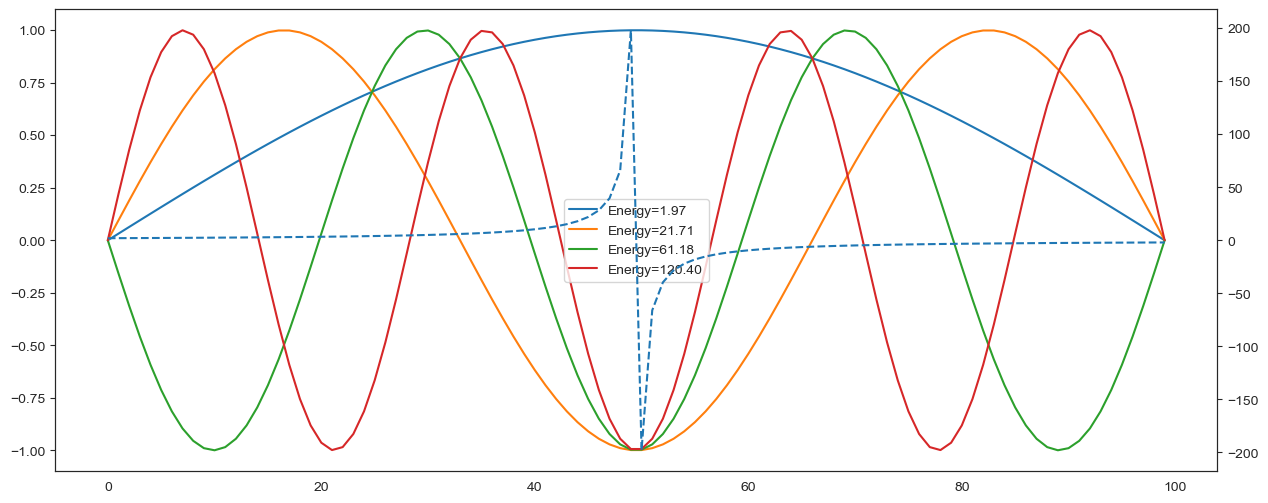

In [102]:
# psi = cos(pi*n*x/L)
L = 1   # 1p meter
b_f = lambda x, n: cos((2*n+1)*pi/L*x) # Base functions, sin and cos   |f>
Hb_f = lambda x, n: -(2*n+1)**2*pi**2/L**2/2*cos((2*n+1)*pi/L*x)   # 1/2 d2/dx2  H|f>
eV = lambda x: -1/(x+1e-6)
max_o = 50
Hm = np.zeros((max_o, max_o), dtype=np.float32)
Sm = np.zeros((max_o, max_o), dtype=np.float32)
eVm = np.zeros((max_o, max_o), dtype=np.float32)
for n in range(0, max_o):
    for m in range(0, max_o):
        Hm[n, m] = quad(lambda x: b_f(x, n)*Hb_f(x, m), -L/2, L/2, epsabs=epsabs)[0]
        Sm[n, m] = quad(lambda x: b_f(x, n)*b_f(x, m), -L/2, L/2, epsabs=epsabs)[0]
        eVm[n, m] = quad(lambda x: b_f(x, n)*eV(x)*b_f(x, m), -L/2, L/2, epsabs=epsabs)[0]
E, V = eig(-Hm+eVm-Sm)
V = np.array(V).T
V = [x for _, x in sorted(zip(E, V))]
V = np.array(V)
E = sorted(E)
x = np.linspace(-L/2, L/2, 100)
fig, ax = plt.subplots(1,1, figsize=(15, 6))
for m in range(4):
    fn = 0
    for n in range(np.shape(V)[0]):
        fn += V[n, m]*b_f(x, n)
    ax.plot(fn, label='Energy=%0.2f'%E[m])
plt.legend()
ax2 = ax.twinx()
ax2.plot(eV(x), '--', label='V')
plt.show()
